<a href="https://colab.research.google.com/github/shahd1995913/OCR-for-Chemistry/blob/main/working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  **Resize the image**

# *Resize the image* for the test Folder image **"The image that we need to test  and make the replacment on it "**

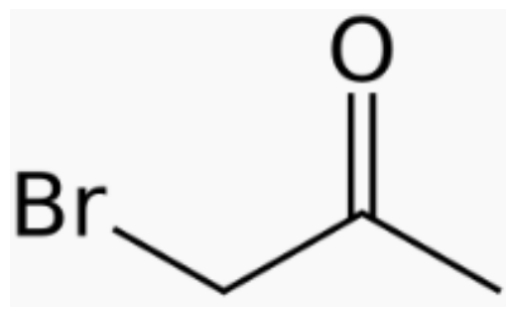

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Resize the image to the desired size
resized_image = cv2.resize(image, (500, 300))

# Plot the image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: turn off the axis labels
plt.show()

In [ ]:
from PIL import Image
import os

def convert_to_white_background(input_folder, output_folder, target_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all the files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Open the image
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)

            # Resize the image to the target size
            resized_img = img.resize(target_size)

            # Create a new image with white background
            new_img = Image.new("RGB", target_size, "white")

            # Check if the image has an alpha channel (fourth channel)
            if len(resized_img.split()) == 4:
                new_img.paste(resized_img, mask=resized_img.split()[3])  # Preserve transparency if present
            else:
                new_img.paste(resized_img)

            # Save the image with white background to the output folder
            output_path = os.path.join(output_folder, filename)
            new_img.save(output_path)

            print(f"Converted image: {output_path}")

# Specify the input and output folders
input_folder = "/content/input_Data"
output_folder = "/content/input_Data"

# Specify the target size for the images
target_size = (150, 150)  # Width: 500, Height: 300

# Call the function to convert the images to have a white background and resize them
convert_to_white_background(input_folder, output_folder, target_size)


Converted image: /content/input_Data/class 3.png
Converted image: /content/input_Data/class 1.png
Converted image: /content/input_Data/class 2.png


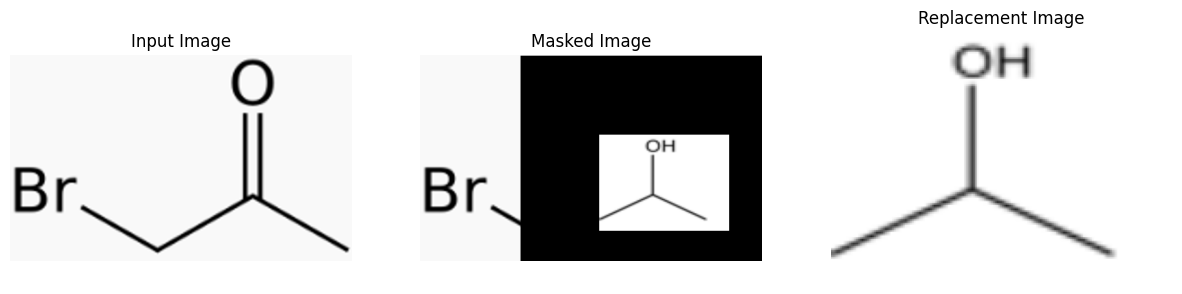

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Calculate the expanded region
expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
expanded_bottom_right = (min(image.shape[1], bottom_right[0] + expand_factor), min(image.shape[0], bottom_right[1] + expand_factor))

# Create a mask with white color in the expanded region
mask = np.ones_like(image) * 255  # Start with a white mask
mask[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = 0  # Set the region to black

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, mask)

# Resize the replacement object to match the region dimensions
resized_object_to_replace = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object in the masked image
masked_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = resized_object_to_replace

# Plot the masked image, the replacement image, and the input image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Input Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Masked Image')
axes[1].axis('off')
axes[2].imshow(cv2.cvtColor(resized_object_to_replace, cv2.COLOR_BGR2RGB))
axes[2].set_title('Replacement Image')
axes[2].axis('off')

plt.show()


# This code is incorrect below

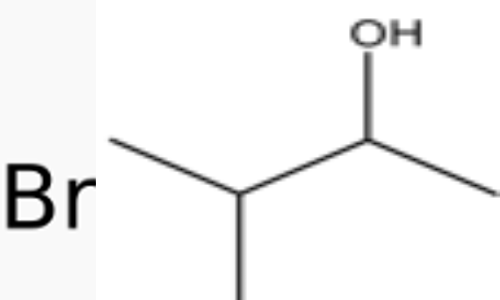

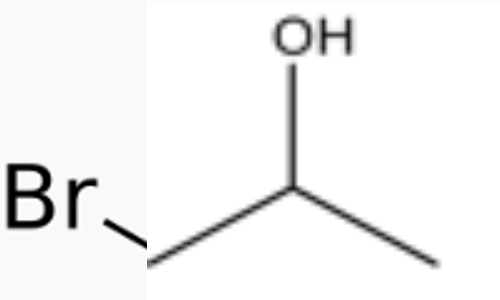

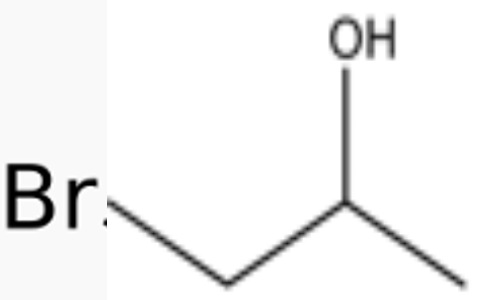

In [ ]:
# This code is incorrect below
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


# Define the paths to the folders containing input and replacement images
input_folder_path = '/content/input_Data/'
label_folder_path = '/content/Label Data/'

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Load the test image
test_image_path = '/content/new test_images/new.png'
test_image = cv2.imread(test_image_path)

# Convert the test image to grayscale
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Loop through each image in the input_data folder
for image_filename in os.listdir(input_folder_path):
    input_image_path = os.path.join(input_folder_path, image_filename)
    input_image = cv2.imread(input_image_path)

    # Convert the input image to grayscale
    gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Perform object detection
    result = cv2.matchTemplate(gray_test_image, gray_input_image, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    top_left = max_loc
    bottom_right = (top_left[0] + gray_input_image.shape[1], top_left[1] + gray_input_image.shape[0])

    # Get the corresponding replacement image from label_data
    replacement_filename = image_filename.replace('class ', 'p')
    replacement_path = os.path.join(label_folder_path, replacement_filename)
    object_to_replace = cv2.imread(replacement_path)

    # Calculate the expanded region
    expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
    expanded_bottom_right = (min(test_image.shape[1], bottom_right[0] + expand_factor), min(test_image.shape[0], bottom_right[1] + expand_factor))

    # Create a mask with white color in the expanded region
    mask = np.ones_like(test_image) * 255
    mask[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = 0

    # Apply the mask to the test image
    masked_image = cv2.bitwise_and(test_image, mask)

    # Resize the replacement object to match the size of the region in the masked image
    resized_object_to_replace = cv2.resize(object_to_replace, (expanded_bottom_right[0] - expanded_top_left[0], expanded_bottom_right[1] - expanded_top_left[1]))

    # Replace the detected object with the resized replacement object in the masked image
    masked_image[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = resized_object_to_replace


    # Display the result
    cv2_imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Input image path: /content/input_Data/.ipynb_checkpoints
Input image path: /content/input_Data/class 3.png
Input image path: /content/input_Data/class 1.png
Input image path: /content/input_Data/class 2.png


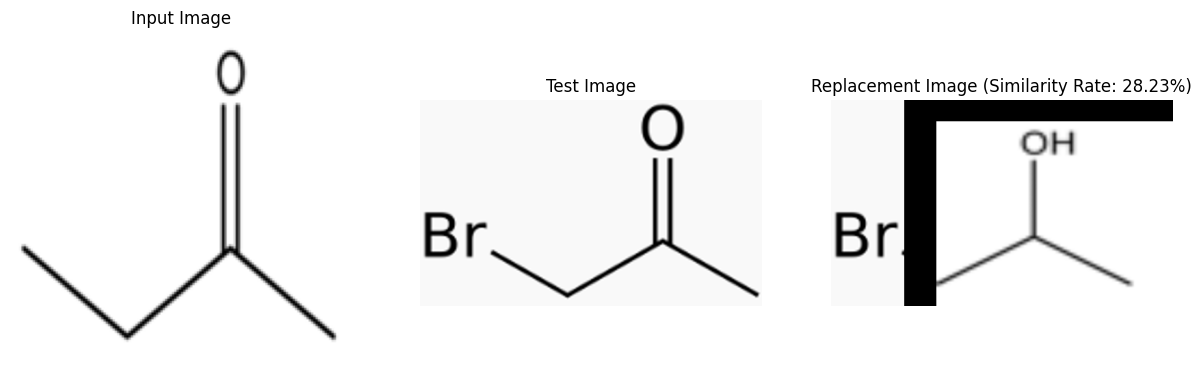

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Define the paths to the folders containing input and replacement images
input_folder_path = '/content/input_Data/'
label_folder_path = '/content/Label Data/'

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Load the test image
test_image_path = '/content/new test_images/new.png'
test_image = cv2.imread(test_image_path)

# Convert the test image to grayscale
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Variables to store the best match information
best_match_val = -np.inf
best_match_region = None
best_match_object_to_replace = None

# Loop through each image in the input_data folder
for image_filename in os.listdir(input_folder_path):
    # Load the input image
    input_image_path = os.path.join(input_folder_path, image_filename)
    print(f"Input image path: {input_image_path}")

    # Check if the file is an image
    if image_filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Load the input image
        input_image = cv2.imread(input_image_path)

        # Check if the input image is loaded successfully
        if input_image is None:
            print(f"Error: Unable to load the input image: {input_image_path}")
            continue  # Skip to the next image if there is an issue

        # Convert the input image to grayscale
        gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Perform object detection
        result = cv2.matchTemplate(gray_test_image, gray_input_image, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Update the best match if the current match is better
    if max_val > best_match_val:
        best_match_val = max_val
        top_left = max_loc
        bottom_right = (top_left[0] + gray_input_image.shape[1], top_left[1] + gray_input_image.shape[0])
        best_match_region = test_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

        # Get the corresponding replacement image from label_data
        replacement_filename = image_filename.replace('class ', 'p')
        replacement_path = os.path.join(label_folder_path, replacement_filename)
        best_match_object_to_replace = cv2.imread(replacement_path)

# Calculate the expanded region
expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
expanded_bottom_right = (min(test_image.shape[1], bottom_right[0] + expand_factor), min(test_image.shape[0], bottom_right[1] + expand_factor))

# Check if the resized replacement image size is valid
if (expanded_bottom_right[0] - expanded_top_left[0] <= 0) or (expanded_bottom_right[1] - expanded_top_left[1] <= 0):
    print("Error: Invalid region size for replacement. Please adjust the expand_factor.")
    #continue  # Skip to the next image if there is an issue

# Calculate the size difference between the replacement object and the region
resized_width_diff = expanded_bottom_right[0] - expanded_top_left[0] - resized_object_to_replace.shape[1]
resized_height_diff = expanded_bottom_right[1] - expanded_top_left[1] - resized_object_to_replace.shape[0]

# Calculate the scaling factors to resize the replacement object
fx = (expanded_bottom_right[0] - expanded_top_left[0]) / resized_object_to_replace.shape[1]
fy = (expanded_bottom_right[1] - expanded_top_left[1]) / resized_object_to_replace.shape[0]

# Resize the replacement object to match the region size in the masked image
resized_object_to_replace = cv2.resize(resized_object_to_replace, None, fx=fx, fy=fy)

# Replace the detected object with the resized replacement object in the masked image
masked_image[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = resized_object_to_replace

# Compute similarity rate
similarity_rate = best_match_val * 100

# Plot the input, test, and replacement images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Input Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Test Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Replacement Image (Similarity Rate: {similarity_rate:.2f}%)')
axes[2].axis('off')

plt.show()


Input image path: /content/input_Data/.ipynb_checkpoints
Input image path: /content/input_Data/class 3.png
Input image path: /content/input_Data/class 1.png
Input image path: /content/input_Data/class 2.png


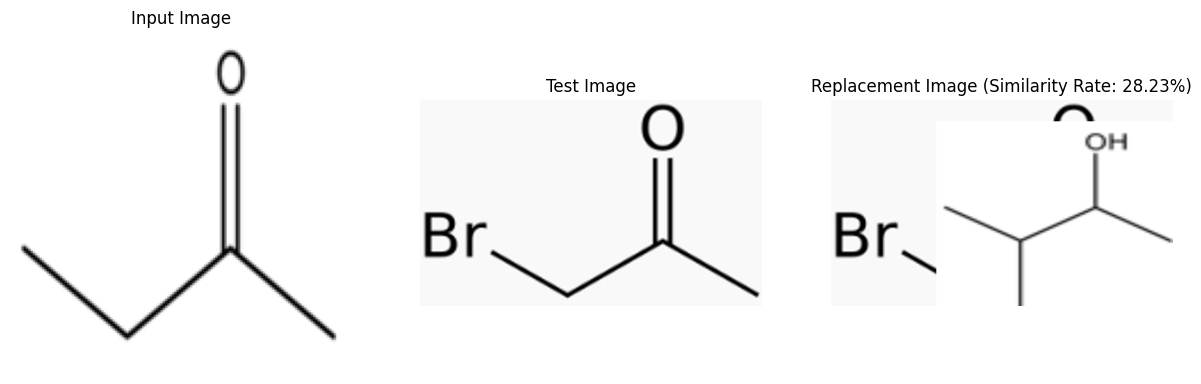

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the paths to the folders containing input and replacement images
input_folder_path = '/content/input_Data/'
label_folder_path = '/content/Label Data/'

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Load the test image
test_image_path = '/content/new test_images/new.png'
test_image = cv2.imread(test_image_path)

# Convert the test image to grayscale
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Variables to store the best match information
best_match_val = -np.inf
best_match_region = None
best_match_object_to_replace = None

# Loop through each image in the input_data folder
for image_filename in os.listdir(input_folder_path):
    # Load the input image
    input_image_path = os.path.join(input_folder_path, image_filename)
    print(f"Input image path: {input_image_path}")

    # Check if the file is an image
    if image_filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Load the input image
        input_image = cv2.imread(input_image_path)

        # Check if the input image is loaded successfully
        if input_image is None:
            print(f"Error: Unable to load the input image: {input_image_path}")
            continue  # Skip to the next image if there is an issue

        # Convert the input image to grayscale
        gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

        # Perform object detection
        result = cv2.matchTemplate(gray_test_image, gray_input_image, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Update the best match if the current match is better
        if max_val > best_match_val:
            best_match_val = max_val
            top_left = max_loc
            bottom_right = (top_left[0] + gray_input_image.shape[1], top_left[1] + gray_input_image.shape[0])
            best_match_region = test_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

            # Get the corresponding replacement image from label_data
            replacement_filename = image_filename.replace('class ', 'p')
            replacement_path = os.path.join(label_folder_path, replacement_filename)
            best_match_object_to_replace = cv2.imread(replacement_path)

# Calculate the expanded region
expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
expanded_bottom_right = (min(test_image.shape[1], bottom_right[0] + expand_factor), min(test_image.shape[0], bottom_right[1] + expand_factor))

# Check if the resized replacement image size is valid
if (expanded_bottom_right[0] - expanded_top_left[0] <= 0) or (expanded_bottom_right[1] - expanded_top_left[1] <= 0):
    print("Error: Invalid region size for replacement. Please adjust the expand_factor.")
    #continue  # Skip to the next image if there is an issue

# Calculate the size difference between the replacement object and the region
resized_width_diff = expanded_bottom_right[0] - expanded_top_left[0] - best_match_object_to_replace.shape[1]
resized_height_diff = expanded_bottom_right[1] - expanded_top_left[1] - best_match_object_to_replace.shape[0]

# Calculate the scaling factors to resize the replacement object
fx = (expanded_bottom_right[0] - expanded_top_left[0]) / best_match_object_to_replace.shape[1]
fy = (expanded_bottom_right[1] - expanded_top_left[1]) / best_match_object_to_replace.shape[0]

# Resize the replacement object to match the region size in the masked image
resized_object_to_replace = cv2.resize(best_match_object_to_replace, None, fx=fx, fy=fy)

# Replace the detected object with the resized replacement object in the masked image
masked_image = test_image.copy()
masked_image[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = resized_object_to_replace

# Compute similarity rate
similarity_rate = best_match_val * 100

# Plot the input, test, and replacement images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Input Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Test Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Replacement Image (Similarity Rate: {similarity_rate:.2f}%)')
axes[2].axis('off')

plt.show()



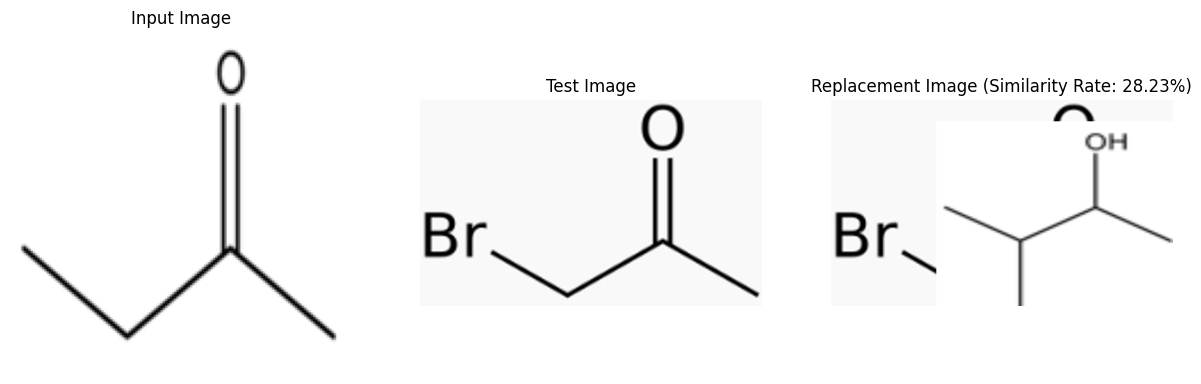

In [88]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the paths to the folders containing input and replacement images
input_folder_path = '/content/input/'
label_folder_path = '/content/Label Data/'

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Load the test image
test_image_path = '/content/new test_images/new.png'
test_image = cv2.imread(test_image_path)

# Convert the test image to grayscale
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Variables to store the best match information
best_match_val = -np.inf
best_match_region = None
best_match_object_to_replace = None

# Loop through each image in the input_data folder
for image_filename in os.listdir(input_folder_path):
    # Load the input image
    input_image_path = os.path.join(input_folder_path, image_filename)

    # Check if the file is an image
    if image_filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        # Load the input image
        input_image = cv2.imread(input_image_path)

        # Check if the input image is loaded successfully
        if input_image is None:
            print(f"Error: Unable to load the input image: {input_image_path}")
            continue  # Skip to the next image if there is an issue

        # Convert the input image to grayscale
        gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

        # Perform object detection
        result = cv2.matchTemplate(gray_test_image, gray_input_image, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        # Update the best match if the current match is better
        if max_val > best_match_val:
            best_match_val = max_val
            top_left = max_loc
            bottom_right = (top_left[0] + gray_input_image.shape[1], top_left[1] + gray_input_image.shape[0])
            best_match_region = test_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

            # Get the corresponding replacement image from label_data
            replacement_filename = image_filename.replace('class', 'p')
            replacement_path = os.path.join(label_folder_path, replacement_filename)

            # Check if the replacement image exists and can be loaded
            if os.path.exists(replacement_path):
                best_match_object_to_replace = cv2.imread(replacement_path)
            else:
                print(f"Replacement image not found for {image_filename}. Skipping...")
                continue  # Skip to the next image if replacement image is missing

# Check if a suitable replacement image was found
if best_match_object_to_replace is None:
    print("No suitable replacement image found.")
else:
    # Calculate the expanded region
    expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
    expanded_bottom_right = (
        min(test_image.shape[1], bottom_right[0] + expand_factor), min(test_image.shape[0], bottom_right[1] + expand_factor))

    # Create a mask with white color in the expanded region
    mask = np.ones_like(test_image) * 255
    mask[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = 0

    # Apply the mask to the test image
    masked_image = cv2.bitwise_and(test_image, mask)

    # Resize the replacement object to match the size of the region in the masked image
    resized_object_to_replace = cv2.resize(best_match_object_to_replace,
                                           (expanded_bottom_right[0] - expanded_top_left[0],
                                            expanded_bottom_right[1] - expanded_top_left[1]))

    # Replace the detected object with the resized replacement object in the masked image
    masked_image[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = resized_object_to_replace

    # Compute similarity rate
    similarity_rate = best_match_val * 100

    # Plot the input, test, and replacement images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Input Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Test Image')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    axes[2].set_title(f'Replacement Image (Similarity Rate: {similarity_rate:.2f}%)')
    axes[2].axis('off')

    plt.show()


In [ ]:
import cv2
import os
import re

# Define the paths to the folders containing input and replacement images
input_folder_path = '/content/input/'
label_folder_path = '/content/Label Data/'

# Load the test image
test_image_path = '/content/new test_images/new.png'
test_image = cv2.imread(test_image_path)

# Convert the test image to grayscale
gray_test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Dictionary to store the accuracy for each matched class
accuracy_dict = {}

for input_image_filename in os.listdir(input_folder_path):
    # Load the input image
    input_image_path = os.path.join(input_folder_path, input_image_filename)

    # Check if the file is an image
    if input_image_filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):


    # Load the input image

      input_image = cv2.imread(input_image_path)

    # Convert the input image to grayscale
      gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
            # Load the input image


        # Convert the input image to grayscale

    # Perform object detection
    result = cv2.matchTemplate(gray_test_image, gray_input_image, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, _ = cv2.minMaxLoc(result)

    # Use regular expression to extract the class information from the filename
    matched_class = re.search(r'class (\d+)', input_image_filename)
    if matched_class:
        matched_class = matched_class.group(1)
    else:
        matched_class = 'Unknown'

    # Get the corresponding replacement image from label_data
    replacement_filename = input_image_filename.replace('class ', 'p')
    replacement_path = os.path.join(label_folder_path, replacement_filename)

    # Calculate and store the accuracy for the matched class
    accuracy_dict[matched_class] = max_val

# Print the accuracy for each matched class
for matched_class, accuracy in accuracy_dict.items():
    print(f"Class {matched_class}: {accuracy:.2f}")


Class 3: 0.28
Class 1: 0.28
Class 2: 0.24
